## Train and fine-tune a Decision Tree for the moons dataset.


a. Generate a moons dataset using make_moons(n_samples=10000, noise=0.4).

b. Split it into a training set and a test set using train_test_split().

c. Use grid search with cross-validation (with the help of the GridSearchCV
class) to find good hyperparameter values for a DecisionTreeClassifier.
Hint: try various values for max_leaf_nodes.

d. Train it on the full training set using these hyperparameters, and measure
your model’s performance on the test set. You should get roughly 85% to 87%
accuracy

We want a classifier. The dataset has binary labels so it is a binary classification, using DecisionTreeClassifier.

In [23]:
from sklearn.datasets import make_moons

moons = make_moons(n_samples=10000, noise=0.4)

moons

(array([[ 0.10285502,  0.88649419],
        [ 1.54455254,  0.37763191],
        [ 1.17358631, -0.01080552],
        ...,
        [-0.18466924,  0.62923651],
        [-0.08947251,  0.73758981],
        [ 0.90776275, -0.70749713]]),
 array([0, 1, 1, ..., 0, 0, 1], dtype=int64))

In [24]:
X = moons[0]
y = moons[1]

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


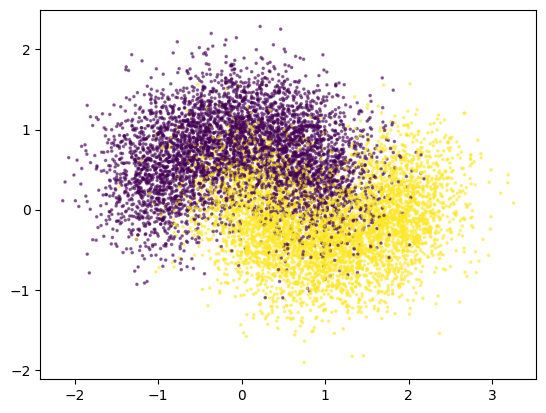

In [25]:
import numpy as np
import matplotlib.pyplot as plt

plt.scatter(
    X[:, 0], X[:, 1],
    c=y,
    alpha=0.5,
    s=2.5
)

In [26]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 2)
(2000, 2)
(8000,)
(2000,)


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

clf = DecisionTreeClassifier()

criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best', 'random']
max_leaf_nodes = [*range(2, 100, 10)]
max_depth = [*range(2, 100, 5)]
min_samples_leaf = [*range(2, 100, 10)]
min_samples_split = [*range(2, 100, 10)]

param_grid = {
    'criterion': criterion,
    'splitter': splitter,
    'max_leaf_nodes': max_leaf_nodes,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
    }

search = HalvingGridSearchCV(clf, param_grid, scoring='accuracy', n_jobs=-1, cv=5, verbose=1)

In [28]:
search.fit(X_train, y_train)

n_iterations: 6
n_required_iterations: 9
n_possible_iterations: 6
min_resources_: 20
max_resources_: 8000
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 12000
n_resources: 20
Fitting 5 folds for each of 12000 candidates, totalling 60000 fits
----------
iter: 1
n_candidates: 4000
n_resources: 60
Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
----------
iter: 2
n_candidates: 1334
n_resources: 180
Fitting 5 folds for each of 1334 candidates, totalling 6670 fits
----------
iter: 3
n_candidates: 445
n_resources: 540
Fitting 5 folds for each of 445 candidates, totalling 2225 fits
----------
iter: 4
n_candidates: 149
n_resources: 1620
Fitting 5 folds for each of 149 candidates, totalling 745 fits
----------
iter: 5
n_candidates: 50
n_resources: 4860
Fitting 5 folds for each of 50 candidates, totalling 250 fits


HalvingGridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
                    param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                                'max_depth': [2, 7, 12, 17, 22, 27, 32, 37, 42,
                                              47, 52, 57, 62, 67, 72, 77, 82,
                                              87, 92, 97],
                                'max_leaf_nodes': [2, 12, 22, 32, 42, 52, 62,
                                                   72, 82, 92],
                                'min_samples_split': [2, 12, 22, 32, 42, 52, 62,
                                                      72, 82, 92],
                                'splitter': ['best', 'random']},
                    scoring='accuracy', verbose=1)

In [29]:
best_model = search.best_estimator_
best_model

DecisionTreeClassifier(criterion='log_loss', max_depth=77, max_leaf_nodes=12,
                       min_samples_split=12)

In [30]:
y_pred = best_model.predict(X_test)

# Evaluate classification model. Accuracy, precision, recall, f1

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1: ", f1_score(y_test, y_pred))

Accuracy:  0.8585
Precision:  0.8451801363193768
Recall:  0.875
F1:  0.8598315998018822


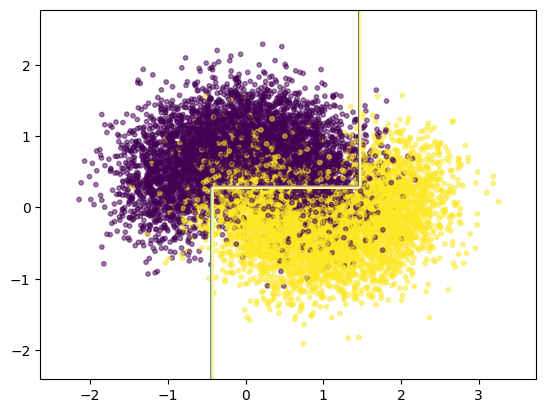

In [31]:
# Plot the entire dataset X, y. Then plot the best_model which is a random forest classifier.

# Plot the entire dataset X, y
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, alpha=0.5)

# Plot the best_model decision boundaries using plt.contour.
# Hint: Use np.meshgrid to generate a grid of points.

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                        np.arange(y_min, y_max, 0.02))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Black boundary
plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
plt.show()

## 8. Grow a forest by following these steps:

### a. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. Hint: you can use Scikit-Learn’s ShuffleSplit class for this.

In [57]:
moons = make_moons(n_samples=1000, noise=0.4)
X = moons[0]
y = moons[1]

print(X.shape)
print(y.shape)

# Generate 1000 subsets of the training set, each containing 100 instances selected randomly.
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X):
    X_mini_train = X[mini_train_index]
    y_mini_train = y[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

(1000, 2)
(1000,)


### b. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.

In [64]:
# Train one Decision Tree on each subset, using the best hyperparameter values found above.
from sklearn.base import clone
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

forest = [clone(best_model) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

print(np.mean(accuracy_scores))

0.80277
0.85


### c. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s mode() function for this). This approach gives you majority-vote predictions over the test set.

In [65]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)


### d. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!

In [66]:
from scipy.stats import mode

y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

# Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model

print(accuracy_score(y_test, y_pred_majority_votes.reshape([-1])))

0.85
